```
 Name: 張宸愷
 ID: 0710018
 ```

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

mode = "holdout"
iris = pd.read_csv("data/iris.data", sep=',', header=None).to_numpy() # read cssv


np.random.shuffle(iris)

def single_run(training: np.ndarray, validation: np.ndarray):
    gaussian_NB = GaussianNB()
    gaussian_NB.fit(training[:, 0:4], training[:,4])
    pred = gaussian_NB.predict(validation[:,0:4])
    confm = confusion_matrix(validation[:,4], pred)
    r = classification_report(validation[:,4], pred, digits=8, output_dict=True)


    return confm, r

def print_metrics(r: dict()):

    print("""
    | category | recall | precision | accuracy |
    |----|----|----|----|
    | p | {} | {} | {} |
    | e | {} | {} | {} |
      """.format(r["p"]["recall"], r["p"]["precision"], r["accuracy"],
                 r["e"]["recall"], r["e"]["precision"], r["accuracy"]))


training = iris.copy()

if mode == "holdout":

    ratio = 0.7

    validation = training[int(training.shape[0]*ratio):].copy()
    training = training[0:int(training.shape[0]*ratio)]
    confm, r = single_run(training, validation)
    print(r)
    # print_metrics(r)
else:
    kf = KFold(n_splits=3)
    sum = []
    for train_i, valid_i in kf.split(X=training[:, 1:]):
        confm = single_run(
            training[train_i], training[valid_i])
        sum.append(confm)
    confm = np.sum(sum, axis=0) / 3

print("tn, fp, fn, tp =", confm)


{'Iris-setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11}, 'Iris-versicolor': {'precision': 0.9090909090909091, 'recall': 0.8333333333333334, 'f1-score': 0.8695652173913043, 'support': 12}, 'Iris-virginica': {'precision': 0.9130434782608695, 'recall': 0.9545454545454546, 'f1-score': 0.9333333333333332, 'support': 22}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9407114624505929, 'recall': 0.9292929292929294, 'f1-score': 0.9342995169082124, 'support': 45}, 'weighted avg': {'precision': 0.9332454984628896, 'recall': 0.9333333333333333, 'f1-score': 0.9326247987117553, 'support': 45}}
tn, fp, fn, tp = [[11  0  0]
 [ 0 10  2]
 [ 0  1 21]]


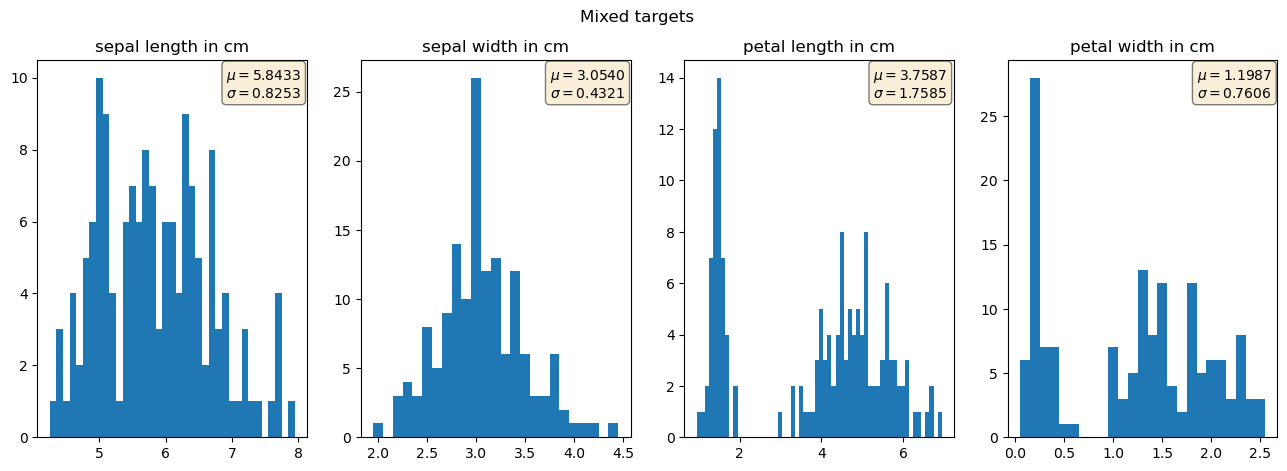

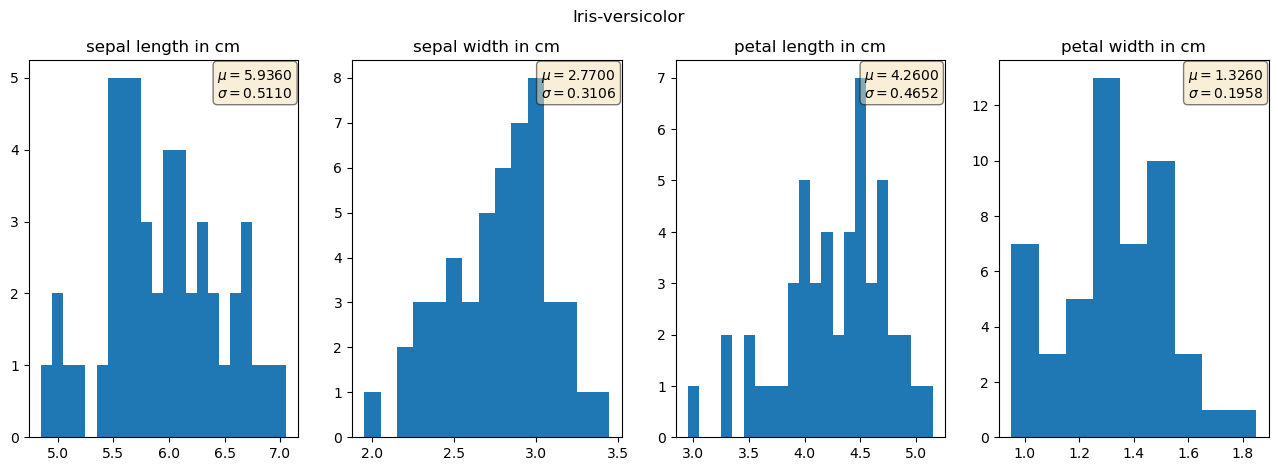

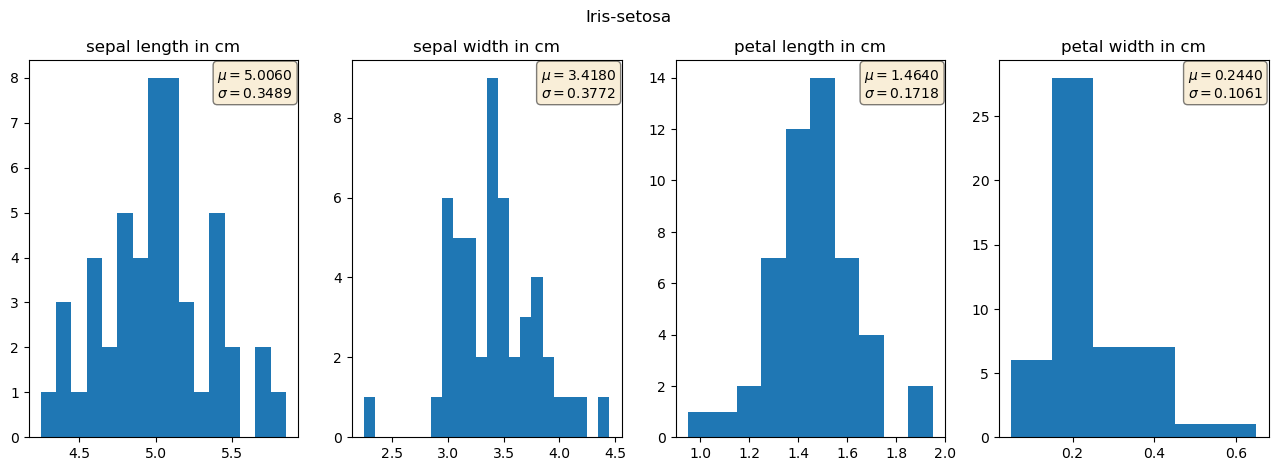

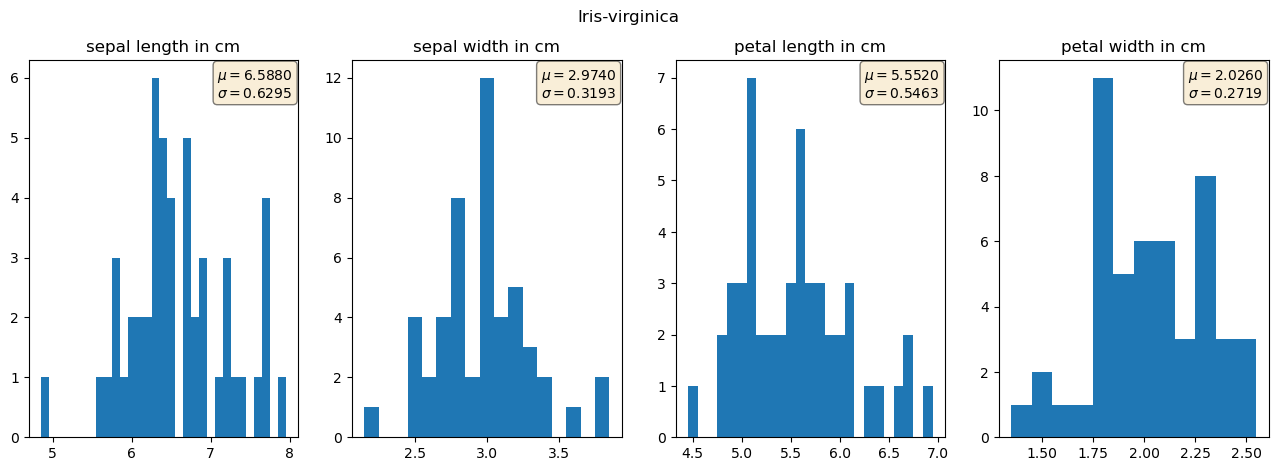

In [31]:
# data visualization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

visual_data: pd.DataFrame = pd.read_csv(
    "data/iris.data", sep=",", header=None)

titles = ["sepal length in cm", "sepal width in cm",
          "petal length in cm", "petal width in cm"]

generate_graph = True

if (generate_graph):
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # plot mixed
    fig, axs = plt.subplots(1, 4, figsize=(16, 5), dpi=100)
    for c in range(0, 4):

        cur = visual_data[c].value_counts(sort=True)
        ar = visual_data[c]
        mean = np.mean(ar)
        std = np.std(ar)
        # print("mean: {} standard deviation: {}".format(mean, std))

        axs[c].bar(cur.index, cur.values, width=0.1)
        axs[c].set_title(titles[c])
        axs[c].text(0.7, 0.9, "$\mu = ${:.4f}\n$\sigma = ${:.4f}".format(mean, std),
                    transform=axs[c].transAxes,
                    fontsize=10, bbox=props)

    fig.suptitle("Mixed targets")

    # plot individual
    classes = ["Iris-versicolor", "Iris-setosa",
               "Iris-virginica"]
    for i in range(3):
        selector = visual_data[4] == classes[i]
        fig, axs = plt.subplots(1, 4, figsize=(16, 5), dpi=100)
        for c in range(0, 4):

            cur = visual_data[selector][c].value_counts(sort=True)
            ar = visual_data[selector][c]
            mean = np.mean(ar)
            std = np.std(ar)
            # print("mean: {} standard deviation: {}".format(mean, std))
            axs[c].bar(cur.index, cur.values, width=0.1)
            axs[c].set_title(titles[c])
            axs[c].text(0.7, 0.9, "$\mu = ${:.4f}\n$\sigma = ${:.4f}".format(mean, std),
                        transform=axs[c].transAxes,
                        fontsize=10, bbox=props)

        fig.suptitle(classes[i])
